# Solved Examples
<div style="text-align: right">INFO 7390 Advances Data Sci/Architecture SEC 03 Spring 2024</div>
<div style="text-align: right">Nidhi Kulkarni</div>


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc">
    <ul class="toc-item">
        <li><span><a href="#Example-1" data-toc-modified-id="Example-1"><span class="toc-item-num">1.&nbsp;&nbsp;</span>Example 1</a></span></li>
        <li><span><a href="#Example-2" data-toc-modified-id="Example-2"><span class="toc-item-num">2.&nbsp;&nbsp;</span>Example 2</a></span>
            <li><span><a href="#References" data-toc-modified-id="References"><span class="toc-item-num">3.&nbsp;&nbsp;</span>References</a></span>
            <ul class="toc-item">

<a id='Example 1'></a>
## Example 1

The dataset includes weight, height, width and lengths of different species of fish. Lets estimate the parameters for the same.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import pandas as pd

In [2]:
fish = pd.read_csv("Fish.csv", index_col=0)
fish.head()

,Weight,Length1,Length2,Length3,Height,Width
Species,,,,,,
Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


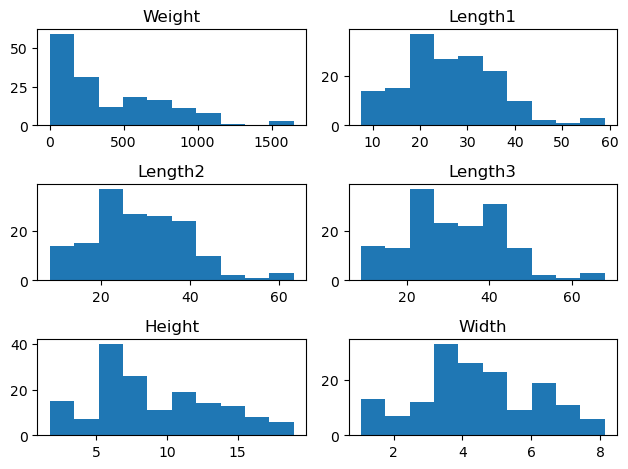

In [3]:
_ = fish.hist(grid=False)
plt.tight_layout()
plt.show()

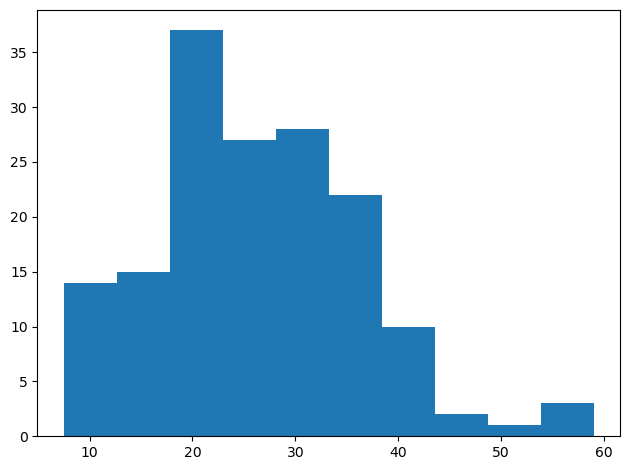

In [4]:
_ = fish['Length1'].hist(grid=False)
plt.tight_layout()
plt.show()

The data is slightly right skewed, lets try to normalise the data

In [5]:
fish_log = np.log(fish['Length1'])
fish_log.skew()

-0.4434671246199157

In [6]:
fish_sqrt = np.sqrt(fish['Length1'])
fish_sqrt.skew()

0.06690965543373949

In [7]:
fish_bc = stats.boxcox(fish['Length1'])[0]
pd.Series(fish_bc).skew()

-0.019000531879014584

From the above transformation techniques, the Box-Cox Transformation works the best as the skewness is reduced to near zero.

/var/folders/cp/7ty_m_h13h75qx_kd031gw700000gn/T/ipykernel_22514/2870767048.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fish_bc)
/Users/nidhikulkarni/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nidhikulkarni/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd

<Axes: ylabel='Density'>

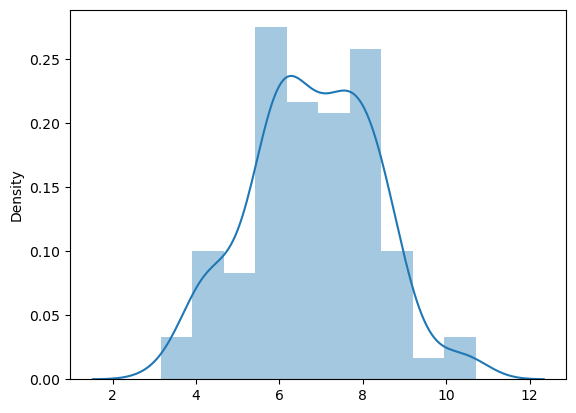

In [8]:
sns.distplot(fish_bc)

After normalising, the parameters can be estimated by calculating the mean and standard deviation.

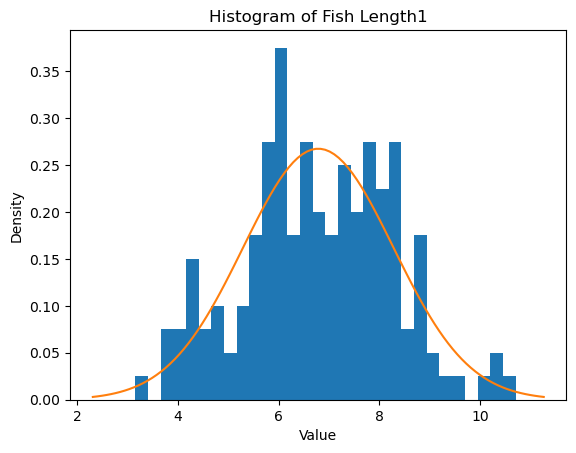

In [9]:
from scipy.stats import norm
plt.hist(fish_bc, bins=30, density=True)

# Now plotting the normal distribution
mean = np.mean(fish_bc)
std_dev = np.std(fish_bc)
x = np.linspace(mean - 3*std_dev, mean + 3*std_dev, 100) 
plt.plot(x, norm.pdf(x, mean, std_dev))

plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Histogram of Fish Length1')
plt.show()


<a id='Example 2'></a>
## Example 2

This dataset consists of forest fires and the factors affecting it such as the rain, wind, temparature etc.

In [10]:
fires = pd.read_csv("forestfires.csv", index_col=0)
fires.head()

,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
X,,,,,,,,,,,,
7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


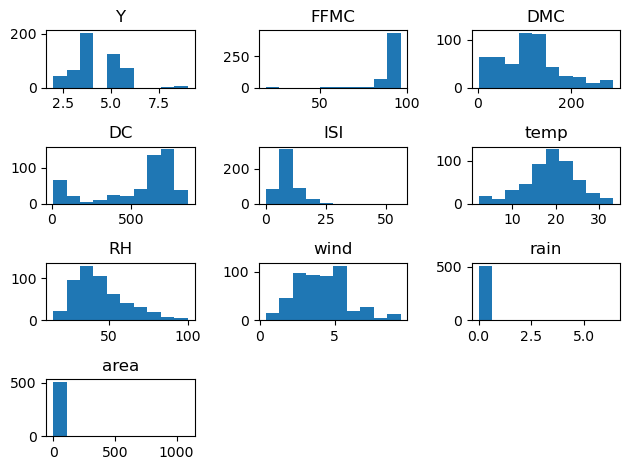

In [11]:
# Plot histogram for the 'Length1' column
_ = fires.hist(grid=False)
plt.tight_layout()
plt.show()

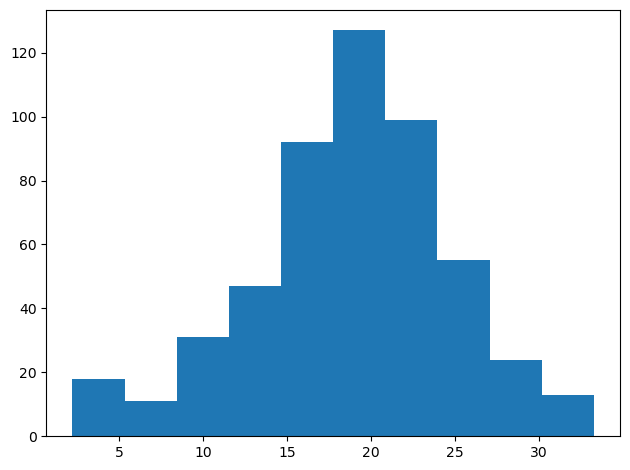

In [12]:
# Plot histogram for the 'Length1' column
_ = fires['temp'].hist(grid=False)
plt.tight_layout()
plt.show()

From the plot it is clear that this is a normal distribution. The skewness measure is of -0.33, which is very low.
To estimate the parameters we can remove the outliers.

In [13]:
fires['temp'].skew()

-0.331172237347285

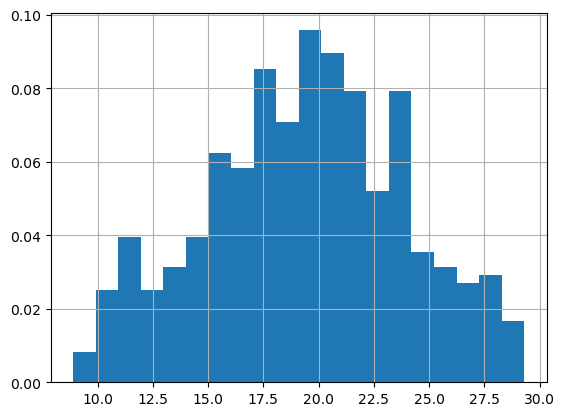

In [14]:
fires = fires[fires.temp != 0] 

Q1 = fires["temp"].quantile(0.30)
Q3 = fires["temp"].quantile(0.70)
IQR = Q3-Q1
lower_whisk = Q1-1.5*IQR
upper_whisk = Q3+1.5*IQR
fires = fires[(fires["temp"] < upper_whisk) & (fires["temp"] > lower_whisk)]
fires.temp.hist(density = True, bins = 20)
plt.show()

In [15]:
fires_mean = fires.temp.mean()
fires_std = fires.temp.std()
fires_mean, fires_std

(19.39426751592357, 4.5313270148508344)

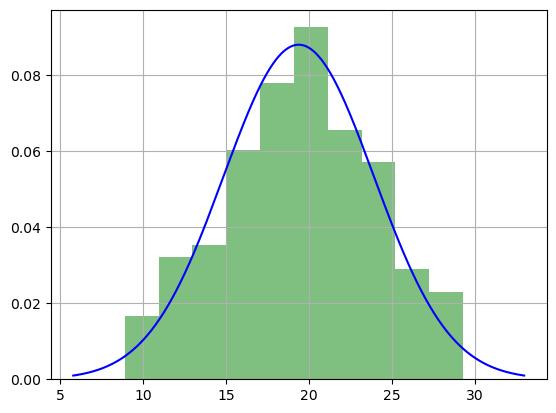

In [16]:
x = np.linspace(fires_mean + 3 * fires_std, fires_mean -3 * fires_std, 1000)

pdf = norm.pdf(x, loc=fires_mean, scale=fires_std)

plt.plot(x, pdf, label='Normal Distribution', color='blue')
plt.hist(fires["temp"], density=True, alpha=0.5, color='green', label='Data Histogram')
plt.grid(True)
plt.show()


<a id='References'></a>
### References 
For the datasets:

1. https://www.kaggle.com/datasets/vipullrathod/fish-market

2. Kaggle